# ICS 434: DATA SCIENCE FUNDAMENTALS

## Exponential Smoothing

---

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random

from scipy.optimize import curve_fit

import matplotlib.ticker as plticker
%matplotlib inline

### Forecasting Random Walks?

* Recall that a random walk is defined as

 $$
 v_t = v_{t-1} + \epsilon_t
 $$

$\hspace{0.6in}$ where $\epsilon_t$ is white noise

* Recall that we defined white noise as having:
  * Constant mean 
  * Constant variance
  * Values are independently and identically distributed
    
    
* A special but  common case is the Gaussian noise

$$
    \epsilon \sim \mathcal{N}(\mu, \sigma) 
$$


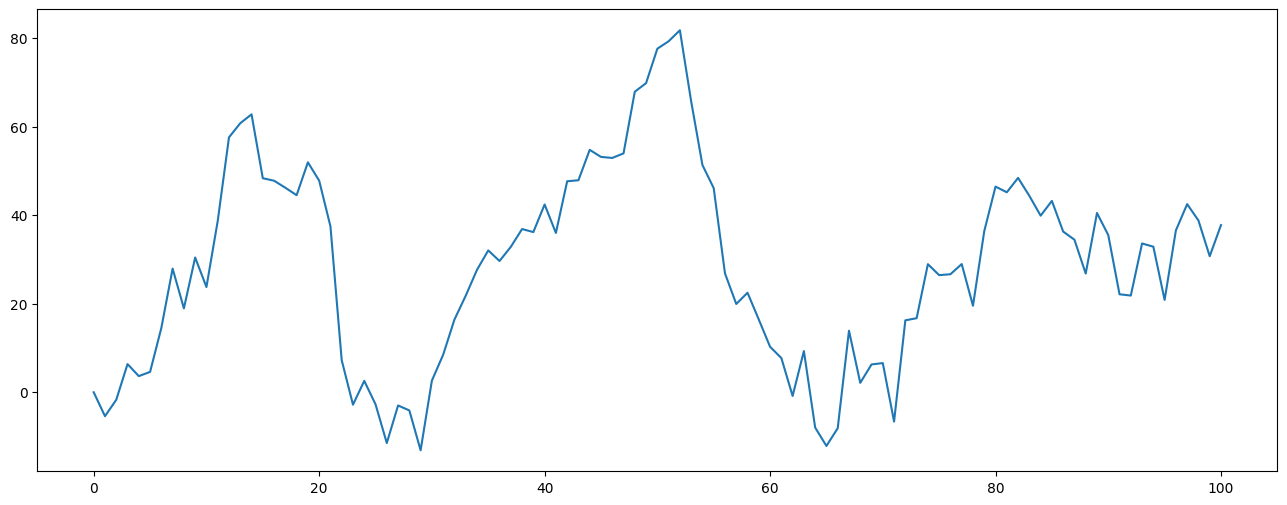

In [9]:
plt.figure(figsize=(16, 6))

v = np.zeros(101)
for t in range(1, len(v)):
    v[t] = v[t-1] + 10 * np.random.normal(0, 1)
    
plt.plot(np.arange(101), v); 

### Random Walks and White Noise

* In a random walk, the change in values is merely the white noise

$$
    v_t - v_{t-1}  = \epsilon_t
$$

* We know that we cannot predict white noise
  * We don't know the distribution nor its parameters
  
* In many cases, the best we can do is to assume that the future will be like the immediate past
  * Causal factors will be the same in the short term
  

### Predicting Random Walks -- Cont'd

* The best guess for $v_t$ is $v_{t-1}$

$$
\hat{v}_{t} = v_{t-1}
$$

* This is the "state of the art" for handling data from random walks 
  * Also, called the naïve method for random walk forecasts
    
* Our error is just the noise


100 100


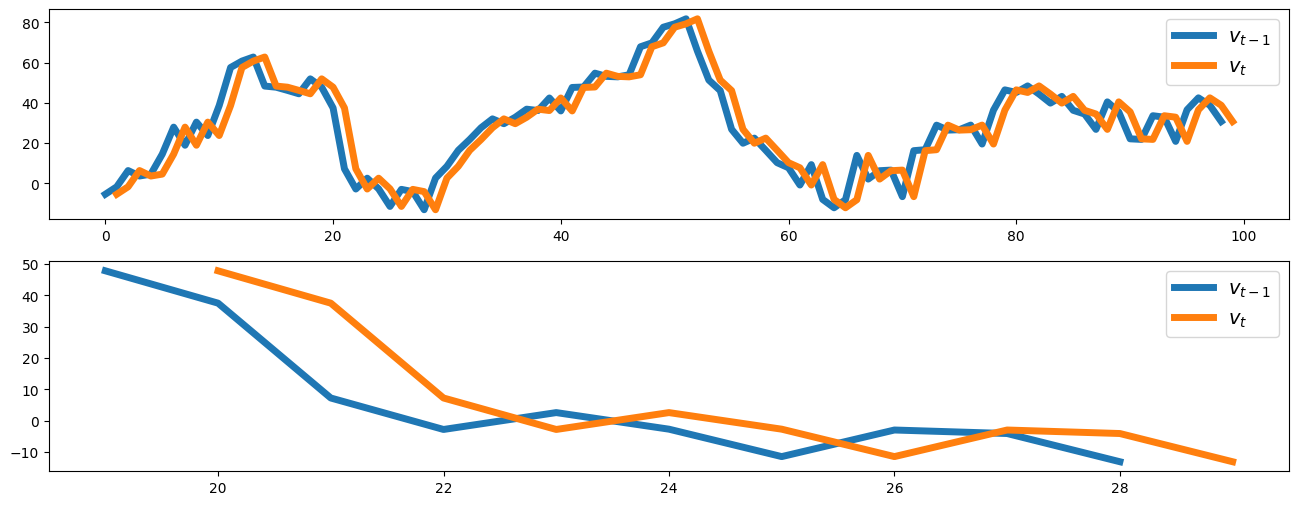

In [10]:
plt.figure(figsize=(16, 6))

x_axis = np.arange(0, 100)
v_t_subset = v[1:101]
v_tm1_subset = v[0:100]
print(len(v_t_subset), len(v_tm1_subset))

plt.subplot(2,1,1)
plt.plot(x_axis[:-1], v_tm1_subset[1:], label="$v_{t-1}$", linewidth=5)
plt.plot(x_axis[1:], v_t_subset[:-1], label="$v_t$", linewidth=5)
# plt.fill_between(x_axis, v_tm1_subset, v_t_subset, color='g', alpha=0.5)
plt.legend(fontsize=14)

plt.subplot(2,1,2)
plt.plot(x_axis[19:29], v_tm1_subset[20:30], label="$v_{t-1}$", linewidth=5)
plt.plot(x_axis[20:30], v_t_subset[19:29], label="$v_{t}$", linewidth=5)
# plt.fill_between(x_axis[19:29], v_tm1_subset[20:30], v_t_subset, color='g', alpha=0.5)
plt.legend(fontsize=14);

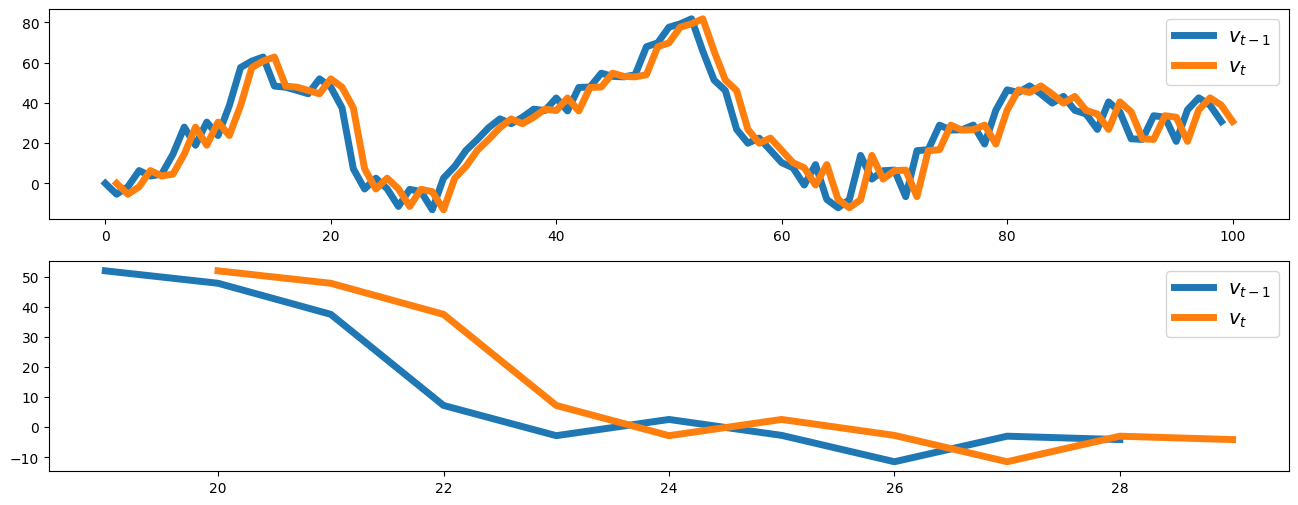

In [11]:
plt.figure(figsize=(16, 6))

x_axis = np.arange(0, 101)

plt.subplot(2,1,1)
plt.plot(x_axis[:-1], v[:100], label="$v_{t-1}$", linewidth=5)
plt.plot(x_axis[1:], v[:100], label="$v_t$", linewidth=5)
plt.legend(fontsize=14)

plt.subplot(2,1,2)
plt.plot(x_axis[19:29], v[19:29], label="$v_{t-1}$", linewidth=5)
plt.plot(x_axis[20:30], v[19:29], label="$v_{t}$", linewidth=5)
plt.legend(fontsize=14);

### Forecasting Using a Sliding Window

* Noise effect can be additive

  * Multiple sources of noise can be compounded onto the signal
  * E.g., in stock market, noise can be due to political instability, public health news, unforeseen weather events, etc.
  * E.g., IoT sensors can be subject to noise from ambient temperature, interference from external devices, natural interference, etc. 

* In some cases, the effect of some sources of noise can be short-lived
    * Cause major spikes in the data that can bias predictions
    * Time series regresses to its original value after the noise subsides
    

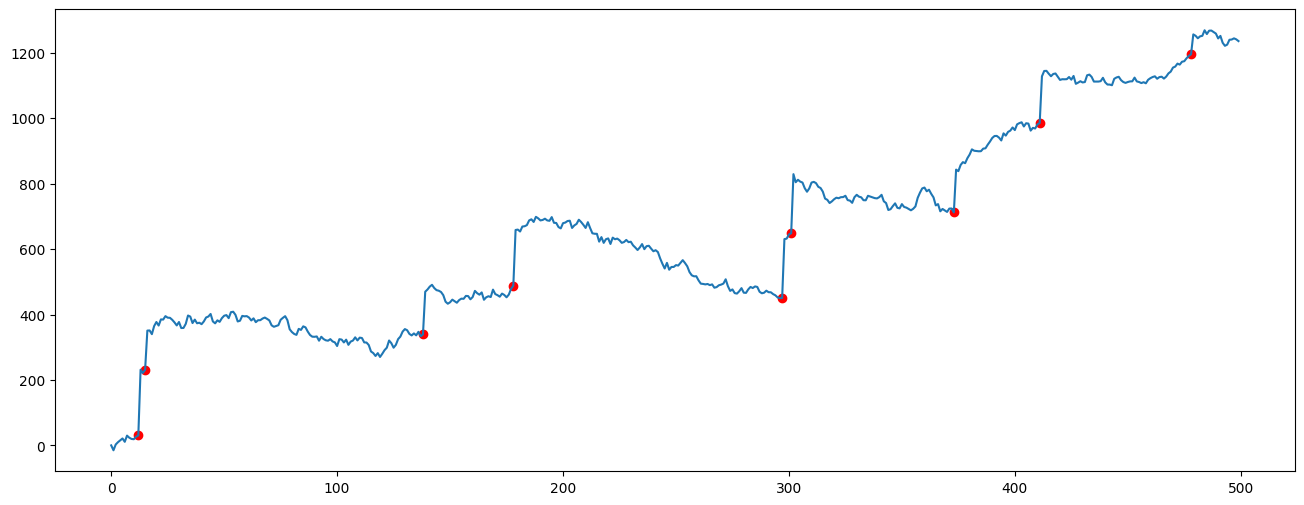

In [12]:
plt.figure(figsize=(16, 6))

v = np.zeros(500)
other_noise = 0
t_with_other_noise = []
for t in range(1, len(v)):
    v[t] = v[t-1] + 10 * np.random.normal(0, 1)
    if np.random.binomial(1, 0.02):
        other_noise = np.random.normal(100, 100) 
        v[t] += other_noise
        t_with_other_noise.append(t-1)
        
    
plt.plot(v);
plt.scatter(t_with_other_noise, np.array(v)[t_with_other_noise], color="red")

### Forecasting Using a Sliding Window -- Cont'd

* Outliers can significantly affect the prediction

<center><img src="https://www.dropbox.com/scl/fi/ms9zhvtbkpicpynsymdkk/outlier.png?rlkey=cplc8ugzmz6i8mg4pleqpnb4q&dl=1" alt="drawing" style="width:500px"/>


### Forecasting Using a Sliding Window -- Cont'd

* To know the past, we need to abstract the noise in the data, i.e., smooth the data
 
* We can smooth the prediction by using the average of "some" $n$ previous values

$$
v_t = \frac{1}{n}\sum_{i=0}^{n-1}v_{t-i}
$$


In [13]:
random_ts = pd.read_csv("data/rand_ts.csv", header=None, names=['val'])
random_ts

,val
0,-1.0
1,-1.2
2,-1.0
3,-1.2
4,-1.0
...,...
318,2.2
319,2.4
320,2.6
321,2.8


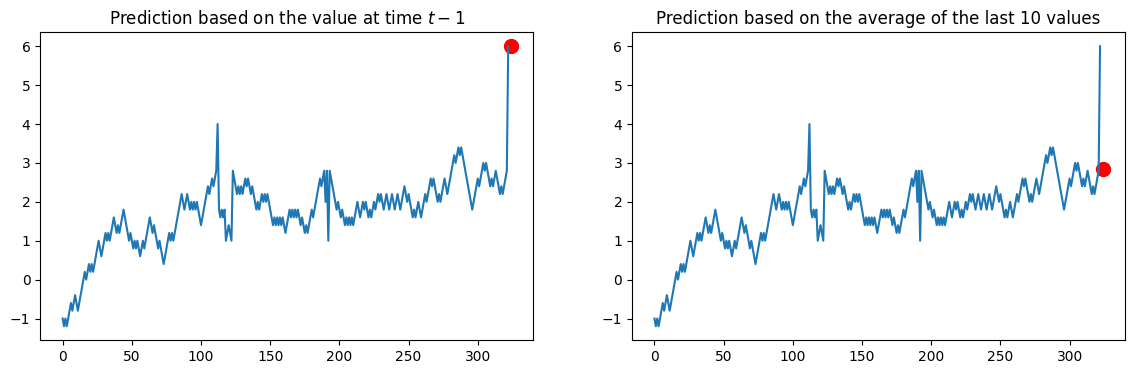

In [14]:
plt.figure(figsize=(14, 4))

pred = random_ts[-10:].mean()

plt.subplot(1,2,1)
plt.plot(random_ts)
plt.scatter(len(random_ts)+1, random_ts.val.iloc[-1], color='r', s=100)
plt.title("Prediction based on the value at time $t-1$", fontsize=12)

plt.subplot(1,2,2)
plt.plot(random_ts)
plt.scatter(len(random_ts)+1, pred, color='r', s=100)
plt.title("Prediction based on the average of the last 10 values", fontsize=12);

### Smoothing Data

* This strategy is the same as the one we used for computing the rolling average for the $\mbox{CO}_2$ data
  * Smoothing the curve prior to finding the power law parameter that best fits it
    * Recall that we used `scipy.optimize.curve_fit`

<center><img src="https://www.dropbox.com/scl/fi/ts67mgee6opv6hnsh468h/trend.png?rlkey=rjtrp2nb3lh5li4oiohcu64sq&dl=1" alt="drawing" style="width:600px"/>


### Smoothing Using a Running or Moving Average

* For every value $x_i$, we compute a new smoothed score value $s_i$
  * I.e., compute $x_i$ in light of its neighbors' values
  * Uses the sliding window strategies dicussed before  

* Example 1:
For some window of size $2k+1$, with $k$ being a positive value, we compute $s_i$ as: 

$$
s_i = \frac{1}{2k+1} \sum_{j=-k}^{k}x_{i+j}
$$

  * Ex. for $k=3$, the window size is $2k+1=7$ and computing the smoothed score $s_{11}$ at position $x_{11}$ amount to averaging the score for positions:

$$
x_{8}, x_{9}, x_{10}, x_{11}, x_{12}, x_{13}, x_{14}
$$

* Example 1:     
For some window of size $k$, we compute $s_i$ as: 

$$
s_i = \frac{1}{k} \sum_{j=1}^{k}x_{i-j}
$$

* Ex. for $k=4$,  computing the smoothed score $s_{11}$ at position $x_{11}$ amount to averaging the score for positions:

$$
x_{7}, x_{8}, x_{9}, x_{10}, x_{11}
$$

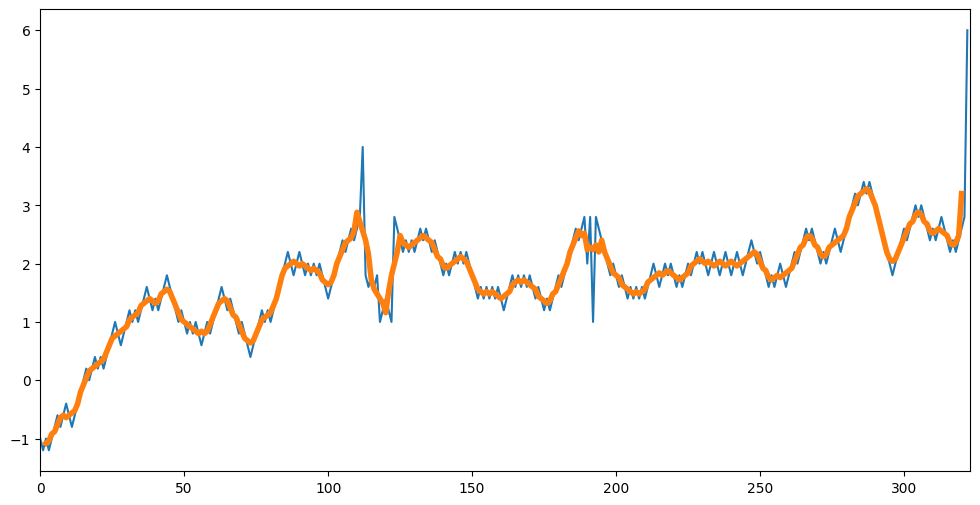

In [15]:
plt.figure(figsize=(12, 6))
plt.xlim(0, len(random_ts))
plt.plot(random_ts)
plt.plot(random_ts['val'].rolling(window=5, center=True).mean(), linewidth=4);

### Effect of the Window Size

* The rolling window smooths the data, but the curve is still bumpy around large spikes

* Sudden jumps in the MA value when a relatively large observation (a spike) comes into or falls out of the moving average window

* We can further smooth the curve by choosing a larger window size
  * More values to dampen the effect of larger values


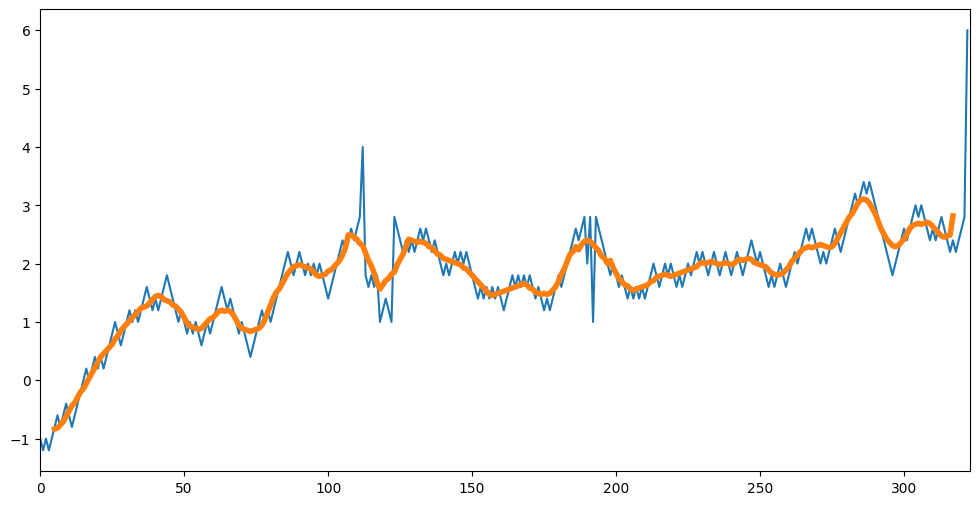

In [16]:
plt.figure(figsize=(12, 6))
plt.xlim(0, len(random_ts))
plt.plot(random_ts)
plt.plot(random_ts['val'].rolling(window=11, center=True).mean(), linewidth=4);

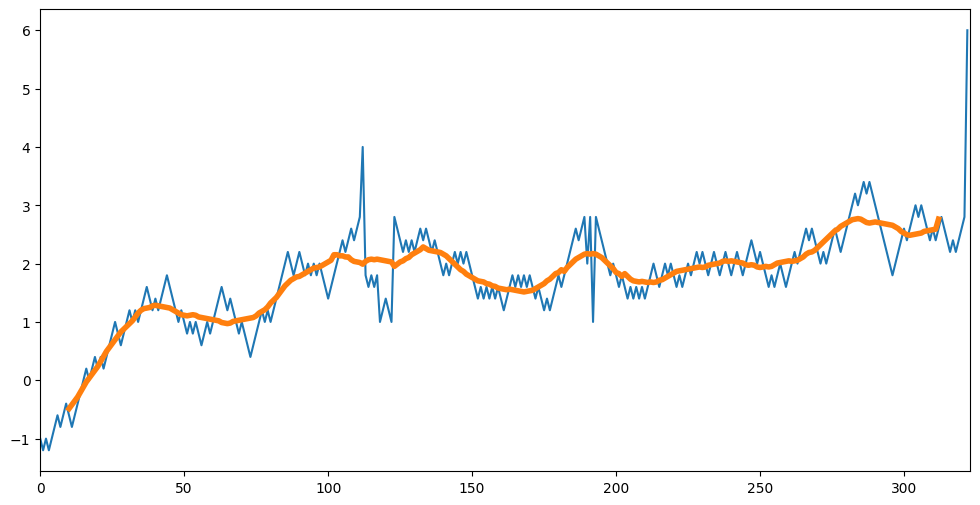

In [17]:
plt.figure(figsize=(12, 6))
plt.xlim(0, len(random_ts))
plt.plot(random_ts)
plt.plot(random_ts['val'].rolling(window=21, center=True).mean(), linewidth=4);

### Handling Outliers

* Expanding the window size to adjust for occasional spikes might result in not capturing the true essence of the data
  * Excessively smoothes the data curve
    * Unnecessarily levels out significant, authentic changes in the data
      * Introduces a delay in the data signal
* Reducing the window size to respond to genuine changes might cause the data to be too closely fitted
  * Compromises the data smoothing capability
  * Leads to abrupt changes that do not accurately represent the underlying data trends

### Handling Outliers -- Cont'd

* We can keep a large window size but, for instance, weigh the values in the window differentially

* The points close to window boundaries contribute less than the point in the center 

<center><img src="https://www.dropbox.com/s/7c4hlmrto5fy9ws/partial_contributions.png?dl=1"/>


### Question

* Which approach used a similar strategy for computing the contribution of points differentially across a window?


### Using a Gaussian for Computing the Contributions 

* We can assign the same preset values to specific indices

* We can use more sophisticated versions that assign custom weights. E.g.,

$$ 
s_i = \sum_{j=-k}^{k}w_{i+j}x_{i+j} 
$$ 

$\hspace{0.6in}$ where weight $w_l$ for a point $x_l$ can be determined using, for example, a Gaussian:

$$
f(x_i, \sigma_x) = \frac{1}{\sqrt{2\pi}\sigma_x}\text{exp}\left(-\frac{1}{2}\left(\frac{x_l - x_i}{\sigma_x}\right)^2\right)
$$


### Challenges of Using a Gaussian for Computing the Contributions  -- Cont'd

* Easy to implement but not ideal:

  * The weighted MA can be computationally intensive to evaluate 
    * For each window, we need to determine a specific $\sigma$ and compute the likelihoods for all the points in the window

  * We lose data at the beginning and the end of data due to window constraints
    
* No easy way to incorporate information about the trend or seasonality    


### Challenges of Using a Gaussian for Computing the Contributions

* The range of values in each window can vary substantially

* For each window, we need to dynamically scale $\sigma$ so that the likelihoods are not too small

* Easy to implement but not ideal:

  * The weighted MA can be computationally intensive to evaluate 
    * For each window, we need to determine a specific $\sigma$ and compute the likelihoods for all the points in the window

  * We lose data at the beginning and the end of data due to window constraints
    
* No easy way to incorporate information about the trend or seasonality    



### Exponential Smoothing

* Exponential smoothing mitigates the shortcomings of the rolling window and weighted rolling window

<center><img src="https://www.dropbox.com/s/rc3zd1q2pjmouyg/previous_contributions.png?dl=1" width="600"></center>

* Intuition: Instead of using simply a subset of the data, we will use all past observations
  * The contributions (weights) associated with each point decays exponentially as the observations "get older"

* This simple concept is the basis for some of the most successful forecasting methods
  * One such power method is exponential smoothing


### Forms of Exponential Smoothing

* Different types of smoothing capture different types of signals
<br><br>

| Type of Smoothing            | Data type                     |
|:-----------------------------|:------------------------------|
| Single Exponential Smoothing | Neither trend nor seasonality |
| Double Exponential Smoothing | Trend but no seasonality      |
| Triple Exponential Smoothing | Trend and seasonality         |


### Single Exponential Smoothing

* Computes smoothed data $s_t$ at time $t$ using the observed value $v_t$ and smoothed value from previous time step ($s_{t-1}$)

$$
s_t = \alpha\cdot v_t + (1-\alpha)s_{t-1} ~~~~~~\text{where}~~~~~~ 0 \le \alpha \le 1
$$


$\hspace{0.6in} - ~ s_t$: smoothed value at time step $t$  
$\hspace{0.6in} - ~ v_t$: actual (unsmoothed) value at time step $t$  
$\hspace{0.6in} - ~ s_{t-1}$: smoothed value at time step $t-1$

* Note that at:
  * $\alpha =0, s_t = s_{t-1}$ we are only retaining the past value
  * $\alpha =1, s_t = v_t$ we are only retaining current values

### Single Exponential Smoothing: Remarks

How is this exponential? 

It turns out that:

$$
\begin{align*}
s_t &= \alpha\cdot v_t + (1-\alpha)s_{t-1} \\
    &= \alpha\cdot v_t + (1-\alpha)(\alpha\cdot v_{t-1} + (1-\alpha)s_{t-2})\\
    &= \alpha\cdot v_t + \alpha(1-\alpha)v_{t-1} + (1-\alpha)^2s_{t-2}\\    
    &= \alpha[v_t + (1-\alpha)v_{t-1}] + (1-\alpha)^2s_{t-2}\\
    &= \alpha[v_t + (1-\alpha)v_{t-1}] + (1-\alpha)^2(\alpha\cdot v_{t-2} + (1-\alpha)s_{t-3})\\    
    &= \alpha[v_t + (1-\alpha)v_{t-1} + (1-\alpha)^2v_{t-2}] + (1-\alpha)^3s_{t-3}\\
    & ~~ \vdots \\
    &= \alpha[v_t + (1-\alpha)v_{t-1} + (1-\alpha)^2v_{t-2}+ \cdots + (1-\alpha)^{t-1}v_{1}]+(1-\alpha)^t v_{0}\\
\end{align*}
$$


In [23]:
alpha = 0.8
t = 10
[round((1-alpha)**i, 4) for i in range(t)]

[1.0, 0.2, 0.04, 0.008, 0.0016, 0.0003, 0.0001, 0.0, 0.0, 0.0]

In [19]:
alpha = 0.2
t = 10
[round((1-alpha)**i, 4) for i in range(t)]

[1.0, 0.8, 0.64, 0.512, 0.4096, 0.3277, 0.2621, 0.2097, 0.1678, 0.1342]

### Single Exponential Smoothing: Remarks -- Cont'd
  

$$
\begin{align*}
s_t  &=  \alpha[v_t + (1-\alpha)v_{t-1} + (1-\alpha)^2v_{t-2}+ \cdots + (1-\alpha)^{t-1}v_{1}]+(1-\alpha)^t v_{0}\\
\end{align*}
$$

* All the previous values contribute to smoothed value of $x_i$ but their contribution as increasingly small
* The contribution of past values is controlled by the decay of the parameter $\alpha$
  * This geometric progression (geometric series) is the discrete version of an exponential function
    * A geometric sequence is discrete while an exponential function is continuous
      * This is where the name for this smoothing method originated
     
$$
s(t) = \int_{-\infty}^t e^{-\alpha(t - u)} v(u) \, du
$$

### Single Exponential Smoothing: Remarks -- Cont'd
  
* Given that we have smoothed our signal, we can use $s_t$ in forecasting

* Our approach is going to be simple

$$ F_{t+1} = s_t$$

* Our data is more resilient to outliers

* The prediction takes into account weighted contributions of previous time points

### Single Exponential Smoothing as a Function of the Forecasting Error

* Note that the forecast $F_{t+1}$ at time $t+1$ is similar to the random walk algorithm used earlier

 
$$
\begin{align*}
s_t &= \alpha\cdot v_t + (1-\alpha)s_{t-1} \\
    &= \alpha\cdot v_t + s_{t-1}-\alpha s_{t-1} \\
    &= s_{t-1} + \alpha (v_t - s_{t-1}) \\
\end{align*}
$$

* Since
$ F_{t+1} = s_t$,
and
$ F_{t} = s_{t-1}$

$\hspace{0.6in}$ then
 
$$
\begin{align*}
F_{t+1} &= F_{t} + \alpha (v_t - F_t)\\
        &= F_{t} + \alpha (E)\\
\end{align*}
$$

$\hspace{0.6in}$ where $\alpha$ is here a fraction of $E$ (the difference between forecasted and observed values) in forecasting 

* This means that the forecast $F_{t+1}$ is simply the forecast at time $t$ ($F_t$) padded with a fraction of the error in prediction $F_t$

### Single Exponential Smoothing as a Function of the Forecasting Error -- Cont'd

<br>
$$
\begin{align}
F_{t+1} &= F_{t-1} + \alpha (E)\\
\end{align}
$$

* $E$ in forecasting (the difference between forecasted and observed values)
* This means that to forecast $F_{t+1}$ is simply the forecast at $F_t$ padded with a fraction of the error in predicting $F_t$.


### Using Exponential Smoothing with  `Pandas.Series`

* The Series object has a `ewm` (exponentially weighted moving (average)) 

```
> random_ts['val'].ewm(alpha = 0.5)
ExponentialMovingWindow [com=0.5,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]
```

* Note that single exponential smoothing is simply a complex weighted average

* We compute the new values by using the `mean` function

```
random_ts['val'].ewm(alpha=0.5).mean()
```


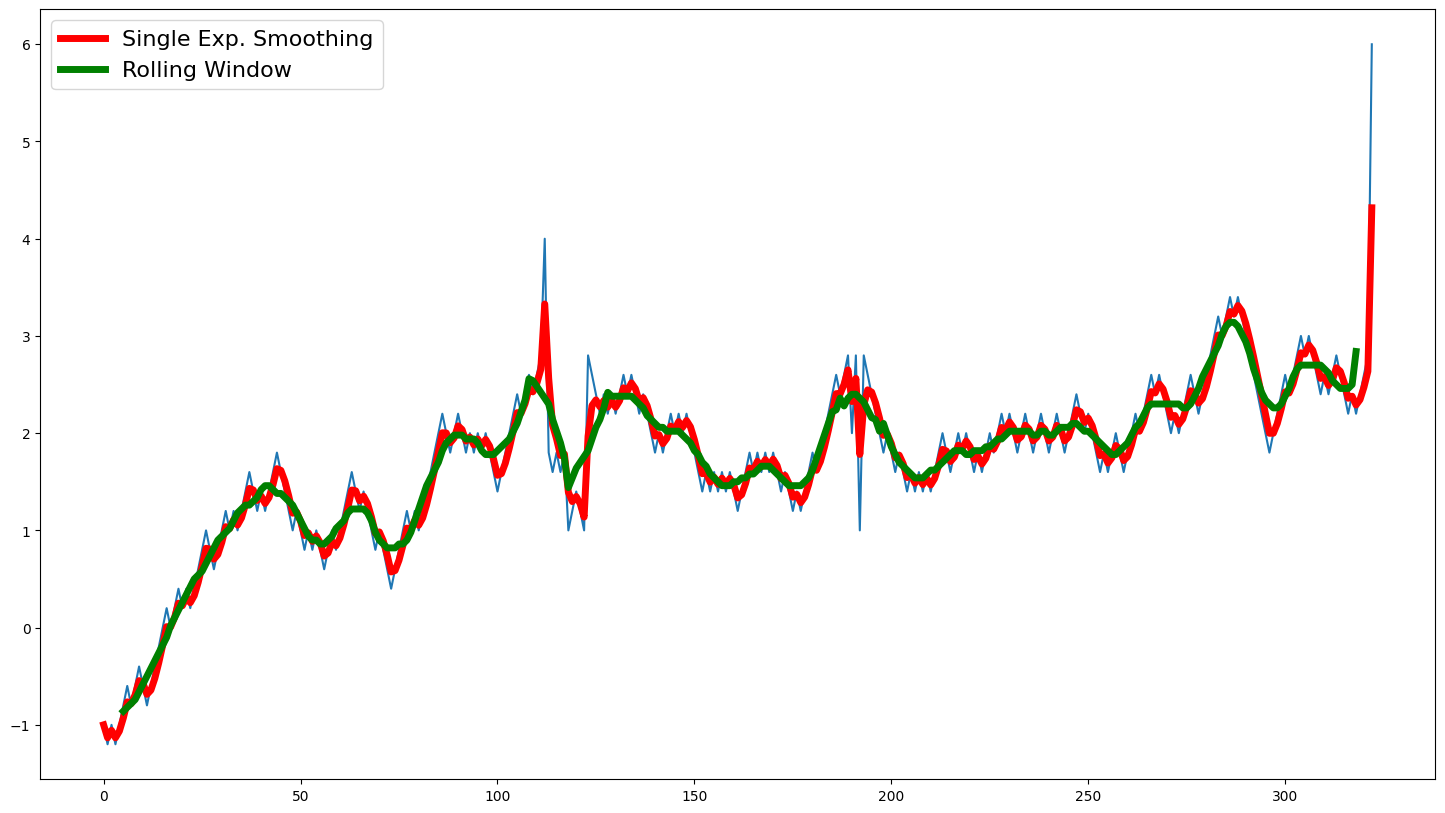

In [21]:
plt.figure(figsize=(18, 10))
plt.plot(random_ts)
plt.plot(random_ts['val'].ewm(alpha=0.5).mean(), color='r', lw=5, label="Single Exp. Smoothing")
plt.plot(random_ts['val'].rolling(window=10, center=True).mean(), color='g', lw=5, label="Rolling Window")
plt.legend(fontsize=16);

### Impact of Parameter $\alpha$

<center><img src="images/exp_smoothing.png" alt="drawing" style="width:600px"/>


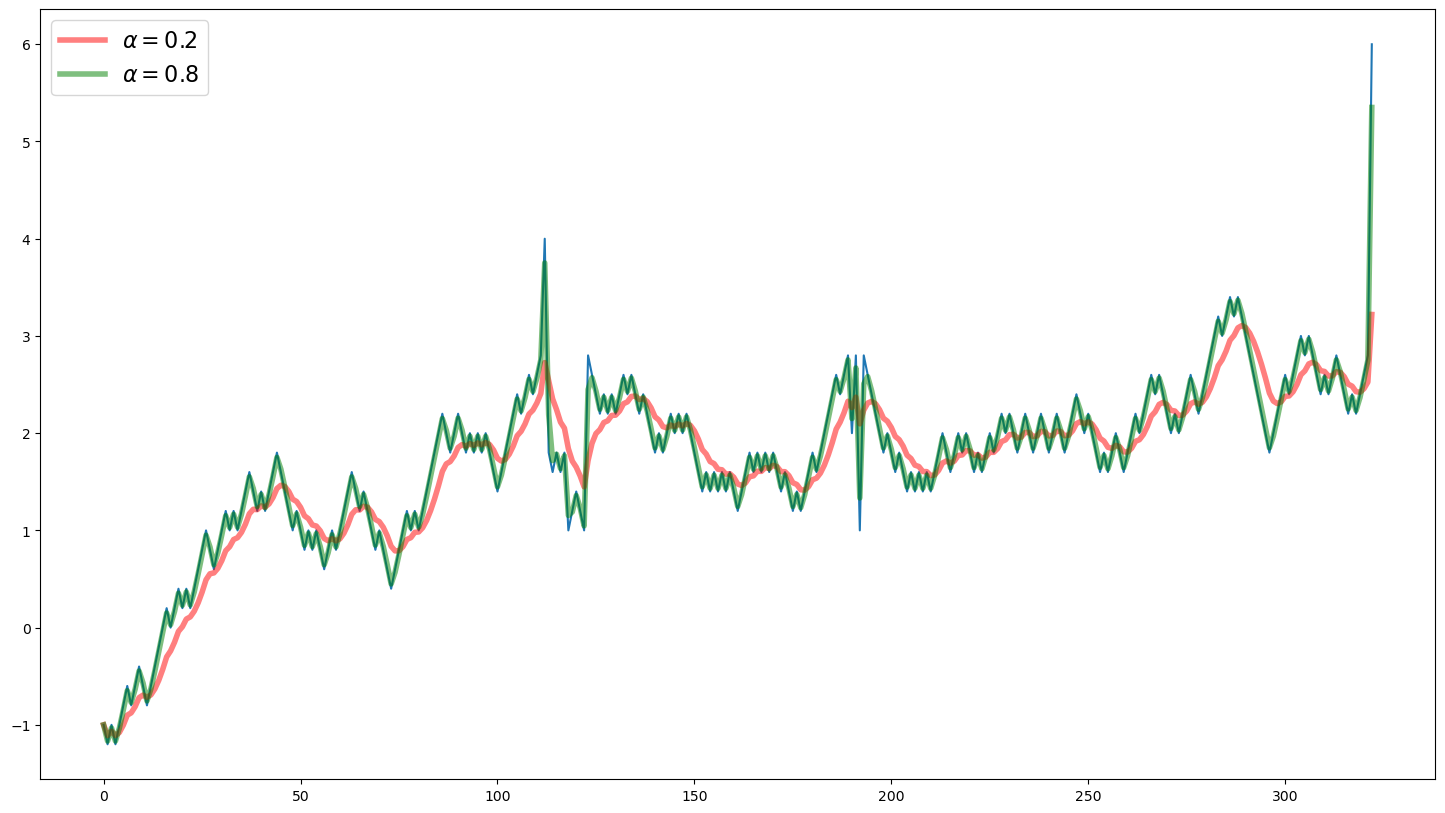

In [15]:
plt.figure(figsize=(18, 10))
plt.plot(random_ts)
plt.plot(random_ts['val'].ewm(alpha=0.2).mean(), color='r', lw=4, alpha=0.5, label=r"$\alpha = 0.2$")
plt.plot(random_ts['val'].ewm(alpha=0.8).mean(), color='g', lw=4, alpha=0.5, label=r"$\alpha = 0.8$")
plt.legend(fontsize=16);

### Double Exponential Smoothing

* It would be unwise to discard the trend information if one exists

* Double exponential smoothing add the information about the trend
  
   * A "non-parametric equivalent" for identifying the equation that best fits the trend

* We will include the trend in our forecast

$$
s_t = s_{t-1} + r_{t-1}
$$

$\hspace{0.6in}$ where $r_{t-1}$ is the trend at time ${t-1}$

* $s_t$ is also called the level 


### Accounting for the Trend

<center><img src="https://www.dropbox.com/s/gnj6o92mm4qp95w/trend_example.png?dl=1" width=550/></center>

* It helps to think of the trend as the exponentially weighted increases since $t=0$
  * The most recent increase gets weight of $\beta$


### Double Exponential Smoothing -- Cont'd

<br>
$$ 
s_t = \alpha \cdot v_t + (1-\alpha)(s_{t-1} + r_{t-1})
$$

- Similar to the equation used in single exponential smoothing

  - We add the effect of the trend to $s_t$ 


### Double Exponential Smoothing for Forecasting


- The double exponential smoothing can be used in forecasting by using the last smoothed value and adding, at each predicted timestep, the smoothed trend to it.

$$
F_{i+1} = s_i + r_{i}
$$



### Triple Exponential Smoothing

* The assumption here is that there is seasonality in the data
  * We need another "quantity" to capture the seasonality
  * Similar to how we derived a quantity to capture the trend
  
* The idea is to capture seasonality by using the data across past seasons at the same time in the period
  * For instance, in time series with a yearly seasonality, the seasonality components for March would be exponentially smoothed with only data points from March in previous years

* A non-parametric way to account for seasonality


### Triple Exponential Smoothing -- Cont'd

* The new equation for the triple exponential component is:

$$
    p_t = \gamma(v_t - s_t) + (1-\gamma) p_{t-k}
$$

$\hspace{0.6in}$ where

$\hspace{1in} - ~~ k$: is the period’s length

$\hspace{1.5in}$* This is a parameter of the model; can be derived using ACF or by finding the value that best fits the data.

$\hspace{1in} - ~~\gamma$: is the new smoothing factor for the seasonal component


### Triple Exponential Smoothing: Remarks

- The concept here is similar to what we have done in the past

- Seasonality component $p_i$ is weighted using the last previous observed point exactly one period, $k$, ago 

* The function for predicting future values is computed as:

$$
F_{t+1} = s_t + r_t + p_t 
$$


### Testing the Exponential Smoothing

* Does the approach pass muster with the $\mbox{CO}_2$ data set we manually investigated?

  * The data exhibits clear trend and seasonality

* Here we implement and test our own version 

  * If you decide to test this with the assignment data, you should use `statsmodel` package 


### Testing the Exponential Smoothing

* Does the approach pass muster with the $\mbox{CO}_2$ data set we manually investigated?

  * The data exhibits clear trend and seasonality

* Here we implement and test our own version 

  * You can also use `statsmodels` package


In [16]:
# function that returns the initial value of trend
# \beta_0
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series["co2_val"][i+slen] - series["co2_val"][i]) / slen
    return sum / slen

# function that return the initial value of seasonality
# \gamma_0
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series["co2_val"][slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series["co2_val"][slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series) + n_preds):
        if i == 0: # initial values
            smooth = series["co2_val"][0]
            trend = initial_trend(series, slen)
            result.append(series["co2_val"][0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series["co2_val"][i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta*(smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth + trend + seasonals[i%slen])
    return result

In [17]:
import pandas as pd

co2_data = pd.read_csv("data/carbon_dioxide.txt", names=["co2_val"])
co2_data.co2_val = co2_data.co2_val.astype('float64')
co2_data.head()

,co2_val
0,315.42
1,316.32
2,316.49
3,317.56
4,318.13


In [18]:
sum(co2_data["co2_val"][12*0: 12*0 + 12])/float(12)

315.8266666666666

In [19]:
sum(co2_data["co2_val"][0:12])/float(12)

315.8266666666666

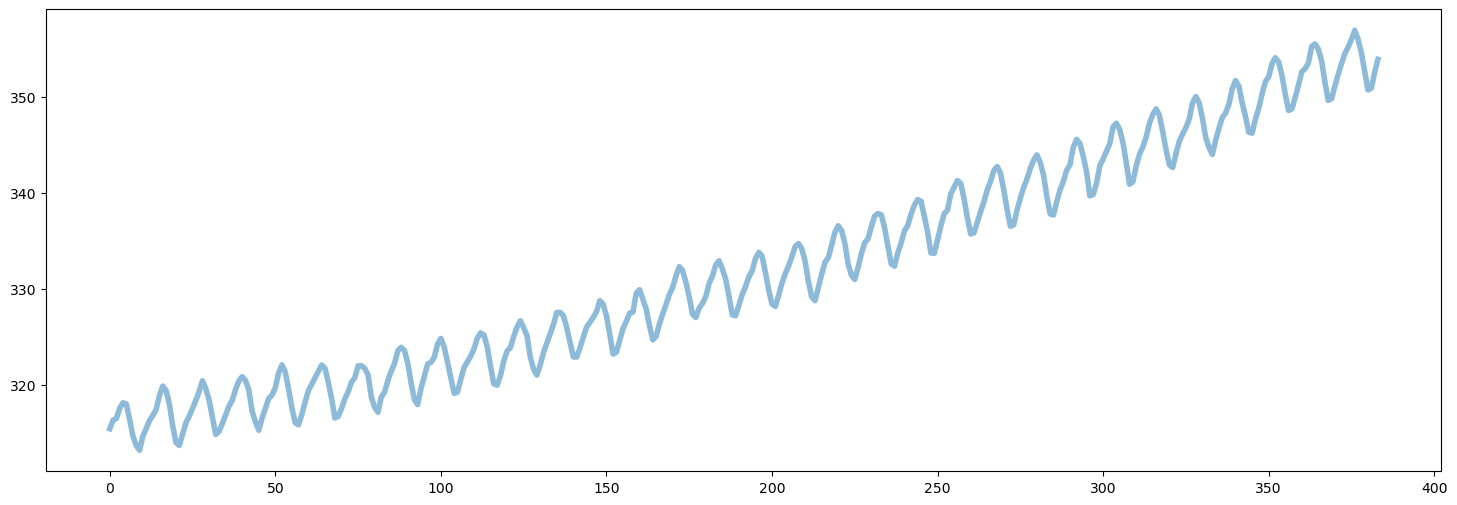

In [20]:
# We use the exponential smoothing to forecast the next 24 months (2 periods)

#forecast = triple_exponential_smoothing(co2_data, 12, 0.005, 0.2, 0.00001, 24)

plt.figure(figsize=(18, 6))
# plt.plot(forecast, 'r--', lw=4) # the smoothed/predicted data in red
plt.plot(co2_data, alpha=0.5, lw=4); # the true data in blue

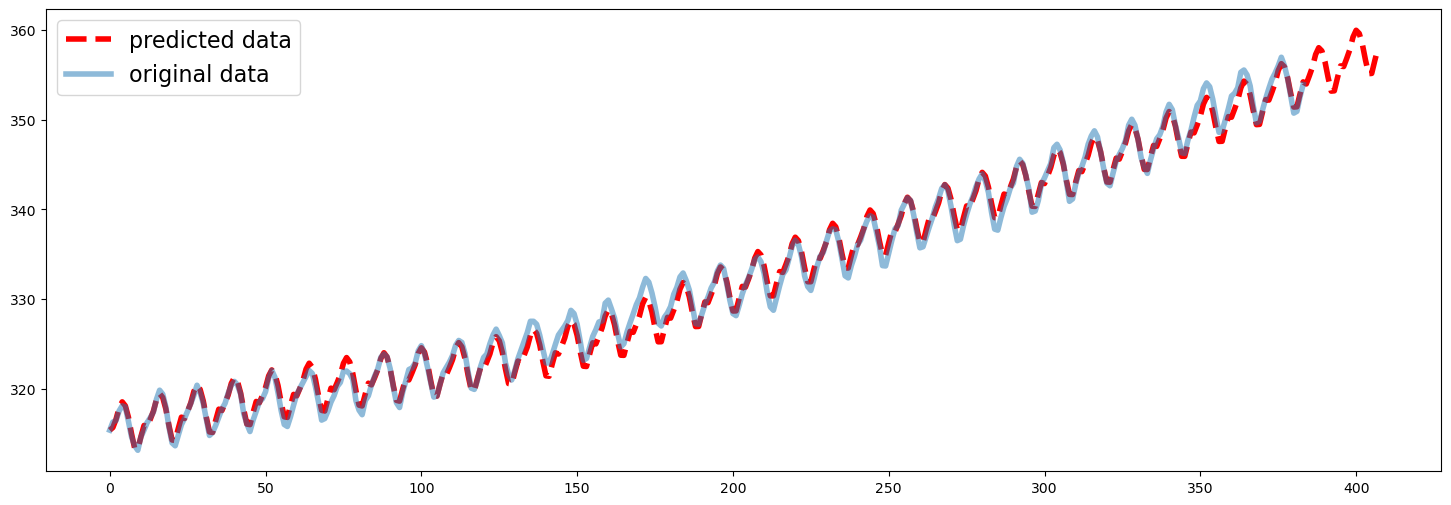

In [21]:
# We use the exponential smoothing to forecast the next 24 months (2 periods)

forecast = triple_exponential_smoothing(co2_data, 12, 0.005, 0.2, 0.00001, 24)

plt.figure(figsize=(18, 6))
plt.plot(forecast, 'r--', lw=4, label="predicted data")  # the smoothed/predicted data in red
plt.plot(co2_data, alpha=0.5, lw=4, label="original data")  # the true data in blue
plt.legend(fontsize=16);